## Readme: 

In the first worksheet “Protein fold changes” you find the proteins which showed a significant change (columns AE-AI, expressed as fold change compared to sample 1).The protein information is in column AO.

- AE-AI: 
- 'Ratio 1(TMT10-126; TMT10-127N)',
- 'Ratio 11(TMT10-127C; TMT10-128N)', 
- 'Ratio 32(TMT10-128C; TMT10-129N)',
- 'Ratio 39(TMT10-129C; TMT10-130N)', 
- 'Ratio 40(TMT10-130C; TMT10-131)'

In [137]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [22]:
data=pd.read_excel("../data/raw/MP_CDR_ES16072021_TMT10plex_v01.xlsx",engine='openpyxl')

In [3]:
len(data)

147

In [23]:
# change columns names to a more understanble name like : intensity_strain_nickname_replicatename: intensity_wt_a

data.rename(columns={"Intensity TMT10-126": "i_wt_a", 
                    "Intensity TMT10-127N": "i_wt_b",
                    "Intensity TMT10-127C": "i_dnrp1_a",
                    "Intensity TMT10-128N": "i_dnrp1_b",
                    "Intensity TMT10-128C": "i_dbem1gal_a",
                    "Intensity TMT10-129N": "i_dbem1gal_b",
                    "Intensity TMT10-129C": "i_dbem1dnrp1gal_a",
                    "Intensity TMT10-130N": "i_dbem1dnrp1gal_b",
                    "Intensity TMT10-130C": "i_dbem1galura_a",
                    "Intensity TMT10-131": "i_dbem1galura_b",
                    "Intensity 1(TMT10-126; TMT10-127N)": "i_wt_merged",
                    "Intensity 11(TMT10-127C; TMT10-128N)": "i_dnrp1_merged",
                    "Intensity 32(TMT10-128C; TMT10-129N)": "i_dbem1gal_merged",
                    "Intensity 39(TMT10-129C; TMT10-130N)": "i_dbem1dnrp1gal_merged",
                    "Intensity 40(TMT10-130C; TMT10-131)": "i_dbem1galura_merged",
                    "Ratio 1(TMT10-126; TMT10-127N)": "r_wt_merged",
                    "Ratio 11(TMT10-127C; TMT10-128N)": "r_dnrp1_merged",
                    "Ratio 32(TMT10-128C; TMT10-129N)": "r_dbem1gal_merged",
                    "Ratio 39(TMT10-129C; TMT10-130N)": "r_dbem1dnrp1gal_merged",
                    "Ratio 40(TMT10-130C; TMT10-131)": "r_dbem1galura_merged",
                    "Ratio TMT10-126": "r_wt_a", "Ratio TMT10-127N": "r_wt_b",
                    "Ratio TMT10-127C": "r_dnrp1_a","Ratio TMT10-128N": "r_dnrp1_b",
                    "Ratio TMT10-128C": "r_dbem1gal_a","Ratio TMT10-129N": "r_dbem1gal_b",
                    "Ratio TMT10-129C": "r_dbem1dnrp1gal_a","Ratio TMT10-130N": "r_dbem1dnrp1gal_b",
                    "Ratio TMT10-130C": "r_dbem1galura_a","Ratio TMT10-131": "r_dbem1galura_b"
                    },inplace=True)

data.columns


Index(['Protein Group', 'Protein ID', 'Accession', 'Significance', '-10lgP',
       'i_wt_a', 'i_wt_b', 'i_dnrp1_a', 'i_dnrp1_b', 'i_dbem1gal_a',
       'i_dbem1gal_b', 'i_dbem1dnrp1gal_a', 'i_dbem1dnrp1gal_b',
       'i_dbem1galura_a', 'i_dbem1galura_b', 'r_wt_a', 'r_wt_b', 'r_dnrp1_a',
       'r_dnrp1_b', 'r_dbem1gal_a', 'r_dbem1gal_b', 'r_dbem1dnrp1gal_a',
       'r_dbem1dnrp1gal_b', 'r_dbem1galura_a', 'r_dbem1galura_b',
       'i_wt_merged', 'i_dnrp1_merged', 'i_dbem1gal_merged',
       'i_dbem1dnrp1gal_merged', 'i_dbem1galura_merged', 'r_wt_merged',
       'r_dnrp1_merged', 'r_dbem1gal_merged', 'r_dbem1dnrp1gal_merged',
       'r_dbem1galura_merged', 'Coverage (%)', '#Peptides', '#Unique', 'PTM',
       'Avg. Mass', 'Description'],
      dtype='object')

In [212]:
data.to_excel("../data/processed/raw-data-columns-name-changed.xlsx")

In [107]:
## Convert significances to p-values . -10*logP=significance 
data_processed=data.copy()
data_processed["p-value"]=10**(-data_processed["Significance"]/10)
data_processed.drop(columns=["-10lgP","Protein Group","Protein ID","PTM"],inplace=True)

data_processed.head()

,Accession,Significance,i_wt_a,i_wt_b,i_dnrp1_a,i_dnrp1_b,i_dbem1gal_a,i_dbem1gal_b,i_dbem1dnrp1gal_a,i_dbem1dnrp1gal_b,...,r_dnrp1_merged,r_dbem1gal_merged,r_dbem1dnrp1gal_merged,r_dbem1galura_merged,Coverage (%),#Peptides,#Unique,Avg. Mass,Description,p-value
0,P19097|FAS2_YEAST,13.75,14490000,14080000,14020000,15350000,17610000,19390000,15860000,16160000,...,1.03,1.29,1.12,1.24,27,46,46,206945,Fatty acid synthase subunit alpha OS=Saccharom...,0.042170
1,P00549|KPYK1_YEAST,14.59,70790000,76000000,64730000,65390000,78940000,83990000,68820000,61770000,...,0.89,1.11,0.89,0.97,50,27,27,54545,Pyruvate kinase 1 OS=Saccharomyces cerevisiae ...,0.034754
2,P02829|HSP82_YEAST,20.10,902100,884300,1288000,912500,914700,931200,1229000,1281000,...,1.24,1.03,1.41,1.41,12,32,6,81406,ATP-dependent molecular chaperone HSP82 OS=Sac...,0.009772
3,P19882|HSP60_YEAST,13.93,11950000,11900000,12900000,13700000,15050000,16540000,15560000,16750000,...,1.12,1.32,1.35,1.39,40,21,21,60752,Heat shock protein 60 mitochondrial OS=Saccha...,0.040458
4,P16861|PFKA1_YEAST,22.64,11000000,10990000,10210000,10150000,11630000,11690000,10680000,10120000,...,0.93,1.06,0.95,1.00,26,27,26,107970,ATP-dependent 6-phosphofructokinase subunit al...,0.005445


Text(0, 0.5, 'Percentages differences of every gene compared to wt_a')

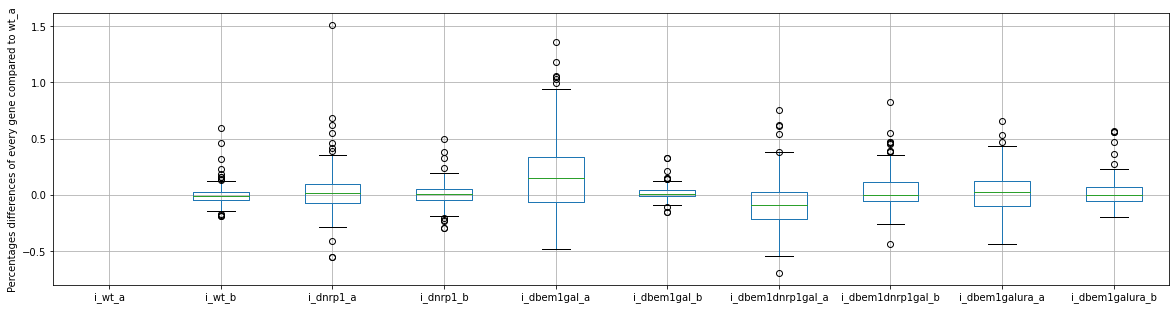

In [44]:
data_subset_diff=data_processed.iloc[:,2:12]
plot=data_subset_diff.pct_change(axis='columns').boxplot(figsize=(20,5))

plot.set_ylabel("Percentages differences of every gene compared to wt_a")

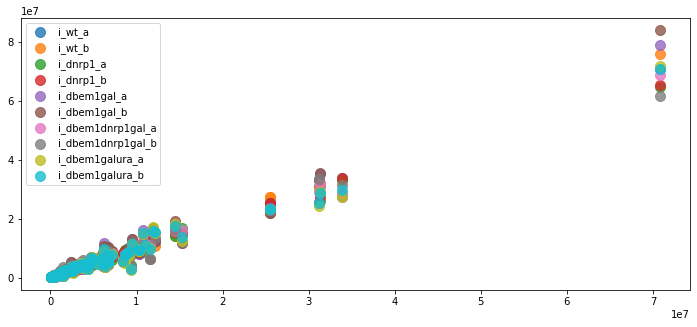

In [221]:

# scatter plot to plot all the data against wt_a
fig=plt.figure(figsize=(12,5))

for i in np.arange(0,10):
    plt.scatter(x=data_subset_diff.iloc[:,0],y=data_subset_diff.iloc[:,i],label=data_subset_diff.columns[i],alpha=0.8,
    s=100)

plt.legend()


<AxesSubplot:>

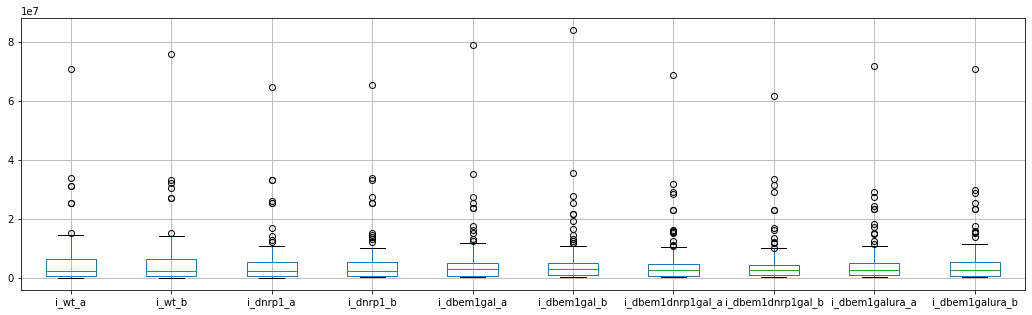

In [63]:
# boxplot of the intensities

data_subset_diff.boxplot(figsize=(18,5))

In [99]:
def top_diff_with_WT(data,column,top_what):
    """[summary]

    Parameters
    ----------
    data : [type]
        [description]
    column : [type]
        [description]
    top_what : [type]
        [description]

    Returns
    -------
    [type]
        [description]
    """
    max_differences=data.pct_change(axis="columns").sort_values(by=column,ascending=False)
    top_ten=max_differences.loc[:,column][0:top_what]

    return top_ten

In [133]:
top_ten_dnrp1= top_diff_with_WT(data_subset_diff,column="i_dnrp1_a",top_what=10)

top_ten_dbem1= top_diff_with_WT(data_subset_diff,column="i_dbem1gal_a",top_what=10)

top_ten_dbem1ura= top_diff_with_WT(data_subset_diff,column="i_dbem1galura_a",top_what=10)

top_ten_wt= top_diff_with_WT(data_subset_diff,column="i_wt_b",top_what=10)
top_ten_dbem1dnrp1= top_diff_with_WT(data_subset_diff,column="i_dbem1dnrp1gal_a",top_what=10)

top_ten_dnrp1

Accession
P03962|PYRF_YEAST     1.504269
Q02046|MTD1_YEAST     0.686784
P32899|IMP3_YEAST     0.621493
P00445|SODC_YEAST     0.545876
P02829|HSP82_YEAST    0.456519
P37303|GLY1_YEAST     0.415653
P17505|MDHM_YEAST     0.392308
P27616|PUR7_YEAST     0.356216
P38205|NCL1_YEAST     0.353042
P39517|DHH1_YEAST     0.349869
Name: i_dnrp1_a, dtype: float64

In [92]:

data_subset_diff.index=data_processed.Accession
max_differences=data_subset_diff.pct_change(axis="columns").sort_values(by='i_dnrp1_a',ascending=False)


max_differences.loc[:,'i_dnrp1_a'][0:10]

Accession
P03962|PYRF_YEAST     1.504269
Q02046|MTD1_YEAST     0.686784
P32899|IMP3_YEAST     0.621493
P00445|SODC_YEAST     0.545876
P02829|HSP82_YEAST    0.456519
P37303|GLY1_YEAST     0.415653
P17505|MDHM_YEAST     0.392308
P27616|PUR7_YEAST     0.356216
P38205|NCL1_YEAST     0.353042
P39517|DHH1_YEAST     0.349869
Name: i_dnrp1_a, dtype: float64

Text(0, 0.5, 'Fold change compared to wt_a')

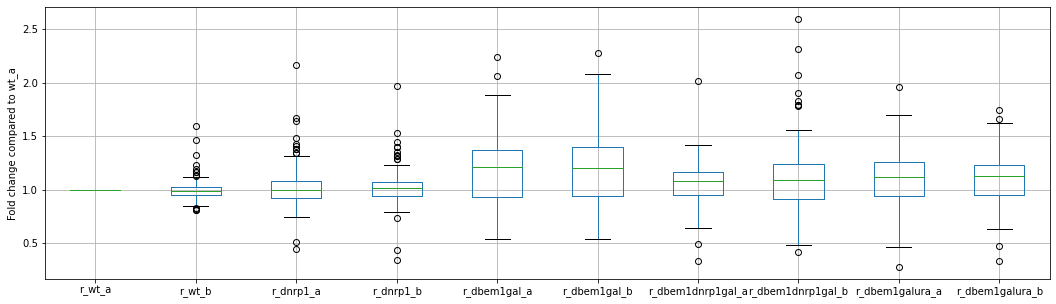

In [119]:
data_subset_ratios=data_processed.iloc[:,12:22]
plot=data_subset_ratios.boxplot(figsize=(18,5))
plot.set_ylabel("Fold change compared to wt_a")

In [197]:
## Top ten max values for the ratios/ fold change per background 


data_subset_ratios_merged=data_processed.iloc[:,27:32]
data_subset_ratios_merged['p-value']=data_processed.loc[:,"p-value"]

data_subset_ratios_merged.index=data_processed.Accession

top_ten=defaultdict(dict)

for col in data_subset_ratios_merged.columns[1:5]:
    top_ten[col]["ratios"]=data_subset_ratios_merged.sort_values(by=col,ascending=False)[0:10][col].tolist()
    top_ten[col]["genes"]=data_subset_ratios_merged.sort_values(by=col,ascending=False)[0:10][col].index.tolist()

top_ten_pd=pd.DataFrame(top_ten)

In [198]:
top_ten_pd

,r_dnrp1_merged,r_dbem1gal_merged,r_dbem1dnrp1gal_merged,r_dbem1galura_merged
ratios,"[2.22, 1.56, 1.49, 1.45, 1.4, 1.35, 1.34, 1.32...","[2.13, 2.01, 1.9, 1.81, 1.8, 1.78, 1.77, 1.75,...","[2.32, 2.01, 1.69, 1.62, 1.61, 1.53, 1.49, 1.4...","[1.94, 1.57, 1.56, 1.55, 1.55, 1.55, 1.51, 1.5..."
genes,"[P03962|PYRF_YEAST, Q02046|MTD1_YEAST, P32899|...","[P22768|ASSY_YEAST, P38998|LYS1_YEAST, P32899|...","[P03962|PYRF_YEAST, P17505|MDHM_YEAST, P39517|...","[P03962|PYRF_YEAST, P17891|CLC1_YEAST, P27616|..."


In [211]:
top_ten_pd.to_excel("../data/processed/top_ten_ratios_compared_to_WT.xlsx")

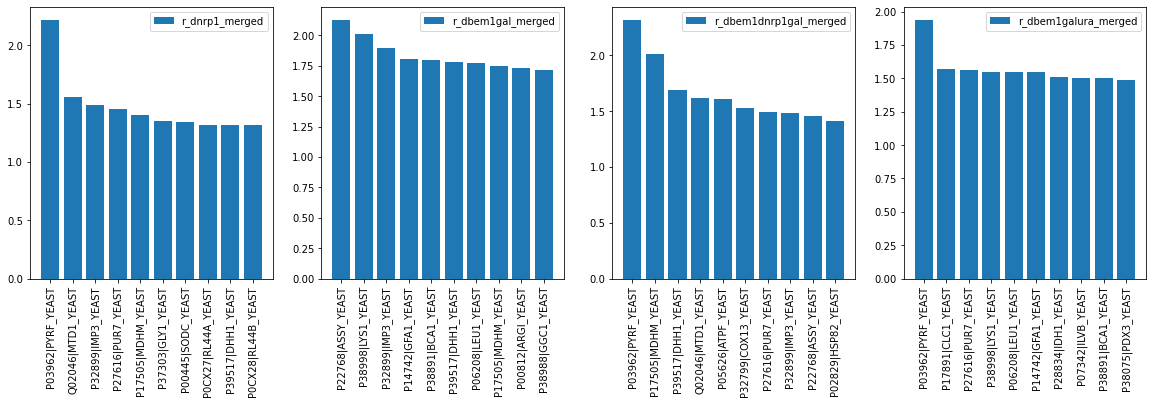

In [199]:
# fig, axs = plt.subplots(1,3,figsize=(10,5))
fig=plt.figure(figsize=(20,5))
j=1
for i in [0,1,2,3]:

   

    plt.subplot(1,4,j)
    plt.bar(top_ten_pd.loc["genes",:][i],top_ten_pd.loc["ratios",:][i],label=top_ten_pd.columns[i])
    
    # axs[i].set_xticklabels(labels=top_ten_pd.loc["genes",:][i],rotation=90)
    plt.xticks(rotation=90)
    plt.legend()
    j=j+1

    

In [202]:
top_ten_pd.columns

Index(['r_dnrp1_merged', 'r_dbem1gal_merged', 'r_dbem1dnrp1gal_merged',
       'r_dbem1galura_merged'],
      dtype='object')

In [207]:
## intersection between genes top ten across backgrounds
col=top_ten_pd.columns
a=top_ten_pd.loc["genes",col[1]]

b=top_ten_pd.loc["genes",col[3]]
set(a).intersection(b)

{'P06208|LEU1_YEAST',
 'P14742|GFA1_YEAST',
 'P38891|BCA1_YEAST',
 'P38998|LYS1_YEAST'}

In [70]:
data2cluster_merged=data_processed.loc[:, data_processed.columns.str.startswith('r_')]
data2cluster_merged=data2cluster_merged.loc[:,data2cluster_merged.columns.str.endswith('merged')]

data2cluster_merged.index=data_processed.Accession

data2cluster_merged.head()

,r_wt_merged,r_dnrp1_merged,r_dbem1gal_merged,r_dbem1dnrp1gal_merged,r_dbem1galura_merged
Accession,,,,,
P19097|FAS2_YEAST,1,1.03,1.29,1.12,1.24
P00549|KPYK1_YEAST,1,0.89,1.11,0.89,0.97
P02829|HSP82_YEAST,1,1.24,1.03,1.41,1.41
P19882|HSP60_YEAST,1,1.12,1.32,1.35,1.39
P16861|PFKA1_YEAST,1,0.93,1.06,0.95,1.00


<Figure size 720x3600 with 0 Axes>

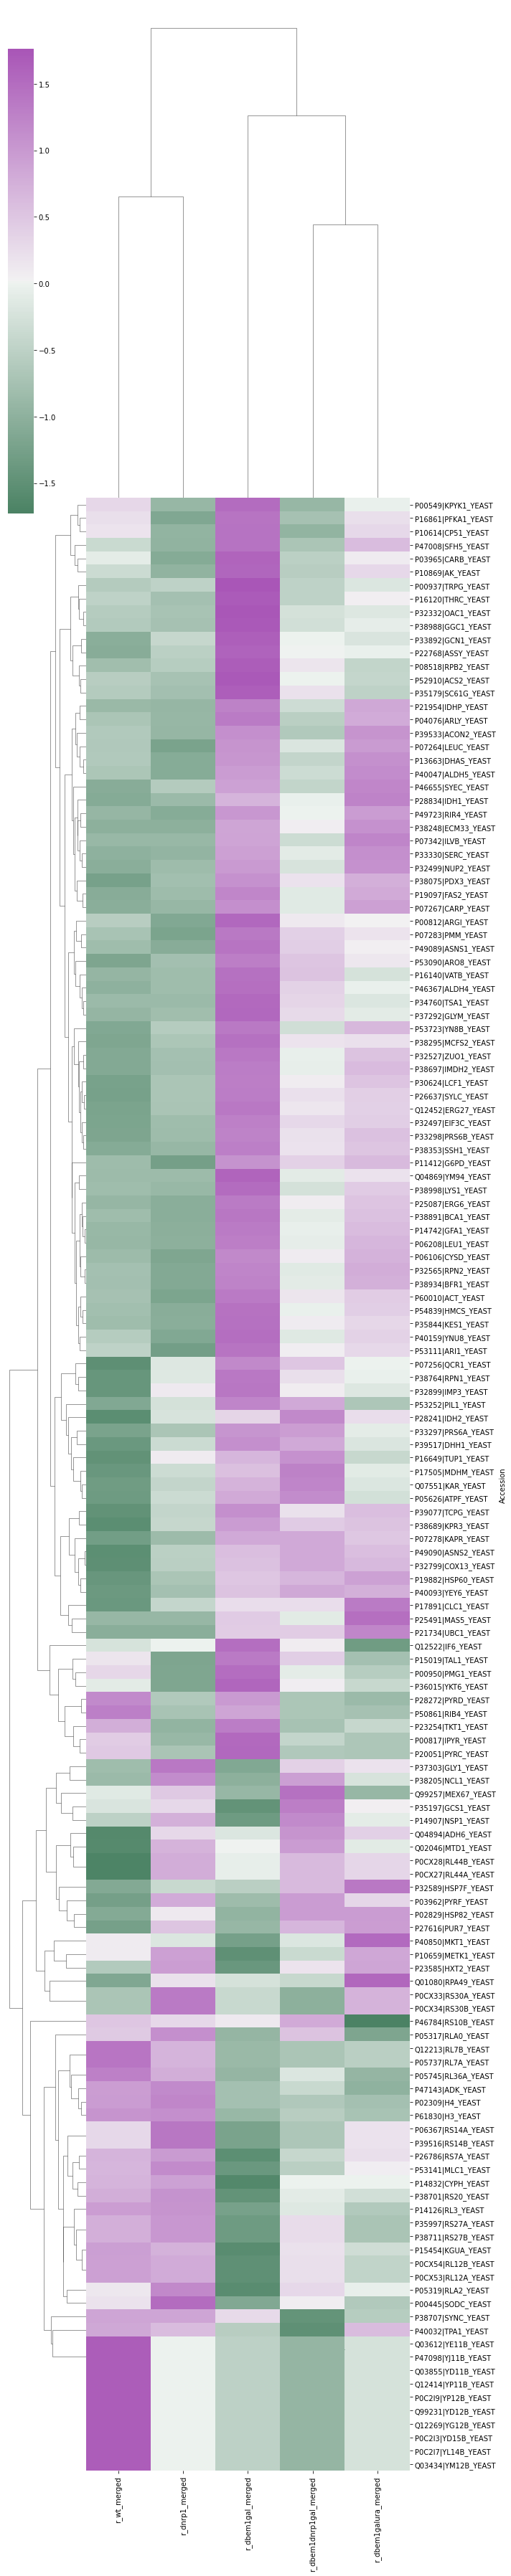

In [210]:

colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)
g=sns.clustermap(data2cluster_merged,z_score=0,cmap=colors,figsize=(10,50))

In [30]:
# To see differences among replicates
data2cluster=data[data.columns[15:25]] # combined data among replicates 
data2cluster.index=data.Accession

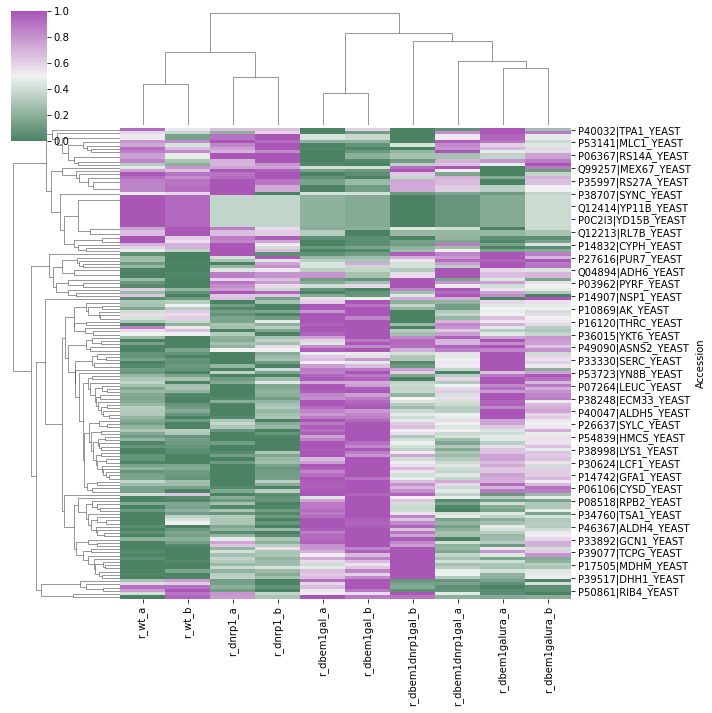

In [31]:
strains=['1', '11','32','39','40']
colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)


g=sns.clustermap(data2cluster,standard_scale=0,cmap=colors)

## Connect the masspec data with satay data 


## Enrichment analysis of the most significant fold change genes 